# EDA  For Credit Analysis 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

df=pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
df.shape

(307511, 122)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
train_missing=df.count()/len(df)
train_missing

SK_ID_CURR                    1.000000
TARGET                        1.000000
NAME_CONTRACT_TYPE            1.000000
CODE_GENDER                   1.000000
FLAG_OWN_CAR                  1.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.864984
AMT_REQ_CREDIT_BUREAU_WEEK    0.864984
AMT_REQ_CREDIT_BUREAU_MON     0.864984
AMT_REQ_CREDIT_BUREAU_QRT     0.864984
AMT_REQ_CREDIT_BUREAU_YEAR    0.864984
Length: 122, dtype: float64

In [6]:
train_missing=(1-train_missing)*100
train_missing

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [8]:
train_missing.sort_values(ascending=False).head(60)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [24]:
train = df.loc[:, train_missing<50]

In [25]:
train.shape

(307511, 81)


### Missing value treatment

As you can observe, there are lot of columns with missing values. There are some columns which has missing values around or 
more than 50%. Other columns has significantly less missing value. Also, the columns for which has missing values are
around or more than 50% are mostly either mean, median or mode. So, there is no way one can replace these missing data.
So, we will not consider these columns for analysis. We will consider other columns for analysis. 
Let's analyse the other columns.

- OCCUPATION_TYPE                 31.345545
- EXT_SOURCE_3                    19.825307
- AMT_REQ_CREDIT_BUREAU_QRT       13.501631
- AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
- AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
- AMT_REQ_CREDIT_BUREAU_MON       13.501631
- AMT_REQ_CREDIT_BUREAU_DAY       13.501631
- AMT_REQ_CREDIT_BUREAU_HOUR      13.501631

### Column: OCCUPATION_TYPE

As you can see, OCCUPATION_TYPE column has 31% missing data, which is also a huge number. So, it would be approprite
to remove this column, but if you go through this column, this seems to look important. So, we will not analyse this column.

In [26]:
train['OCCUPATION_TYPE'].head(20)

0        Laborers
1      Core staff
2        Laborers
3        Laborers
4      Core staff
5        Laborers
6     Accountants
7        Managers
8             NaN
9        Laborers
10     Core staff
11            NaN
12       Laborers
13        Drivers
14       Laborers
15       Laborers
16        Drivers
17       Laborers
18       Laborers
19     Core staff
Name: OCCUPATION_TYPE, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

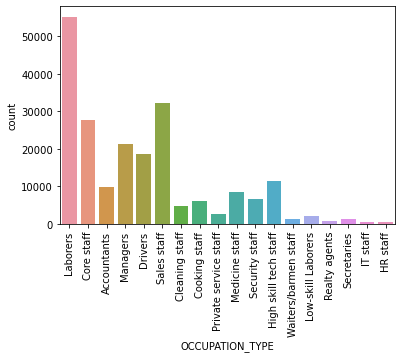

In [28]:
sns.countplot(x= 'OCCUPATION_TYPE', data = train)
plt.xticks(rotation=90)


As you can see that this column has considerable perentage of missing values, that is 31%. Since it is a categorrical column,
we can only replace it with mode value. But, replacing all of these 31% missing values with "Laborers" class will not be fair.
So, we will leave it as it is and will not do any missing value treatment here.


- "Skew" is basically a descriptor of distributions. Instead of being symmetric (think bell curve or normal distributions), 
skewed graphs are usually shifted to one side.

In [27]:
#Column: EXT_SOURCE_3

train['EXT_SOURCE_3'].head(10)

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
5    0.621226
6    0.492060
7    0.540654
8    0.751724
9         NaN
Name: EXT_SOURCE_3, dtype: float64

<AxesSubplot:ylabel='Frequency'>

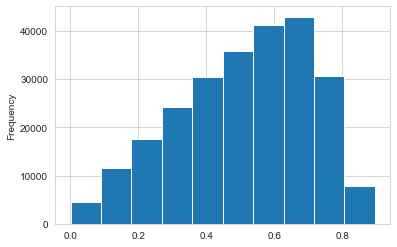

In [29]:
# Plotting the distribution
sns.set_style('whitegrid')
train['EXT_SOURCE_3'].plot.hist()

In [30]:
train['EXT_SOURCE_3'].mean()

0.5108529061800121

In [31]:
train['EXT_SOURCE_3'].mode()

0    0.7463
dtype: float64

- This data is a skewed normal distribution

In [32]:
#Column: AMT_REQ_CREDIT_BUREAU_QRT
train['AMT_REQ_CREDIT_BUREAU_QRT'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

<AxesSubplot:ylabel='Frequency'>

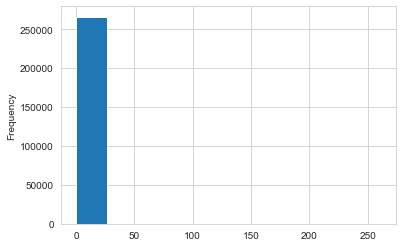

In [33]:
df['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist()

In [34]:
num_unique_values=len(train['AMT_REQ_CREDIT_BUREAU_QRT'].unique())
num_unique_values

12

<AxesSubplot:ylabel='Frequency'>

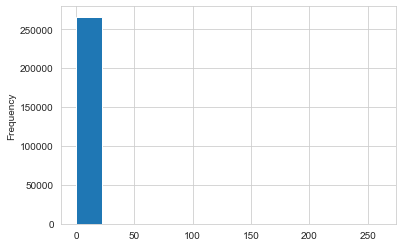

In [35]:
train['AMT_REQ_CREDIT_BUREAU_QRT'].plot.hist(bins = num_unique_values)

In [36]:
train['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [37]:
train['AMT_REQ_CREDIT_BUREAU_QRT'].mean()

0.26547414959848414

In [38]:
train['AMT_REQ_CREDIT_BUREAU_QRT'].mode()

0    0.0
dtype: float64

- Since the column only takes discrete values, 1 or 0, so we cannot replace it by mean value. Here, we will replace it by mode. 